In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Abstract

Here's a brief description of each of the attributes or labels in the dataset:

Invoice ID: A unique identifier for each invoice or transaction.

Branch: The branch or location where the transaction occurred.

City: The city where the branch is located.

Customer Type: Indicates whether the customer is a regular or new customer.

Gender: The gender of the customer.

Product Line: The category or type of product purchased.

Unit Price: The price of a single unit of the product.

Quantity: The number of units of the product purchased.

Tax 5%: The amount of tax (5% of the total cost) applied to the transaction.

Total: The total cost of the transaction, including tax.

Date: The date when the transaction took place.

Time: The time of day when the transaction occurred.

Payment: The payment method used (e.g., credit card, cash).

COGS (Cost of Goods Sold): The direct costs associated with producing or purchasing the products sold.

Gross Margin Percentage: The profit margin percentage for the transaction.

Gross Income: The total profit earned from the transaction.

Rating: Customer satisfaction rating or feedback on the transaction.

In [2]:
df=pd.read_csv('/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv')
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.corr(numeric_only=True)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


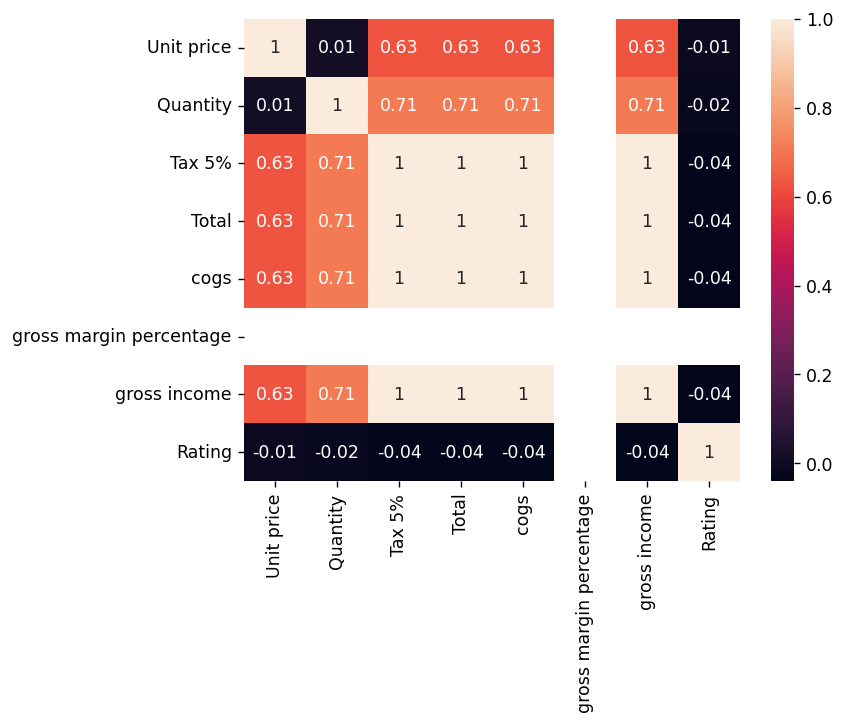

In [6]:
plt.figure(dpi=125)
sns.heatmap(np.round(df.corr(numeric_only=True),2),annot=True)
plt.show()

The best coorelated are Tax 5%,Total,cogs.gross income

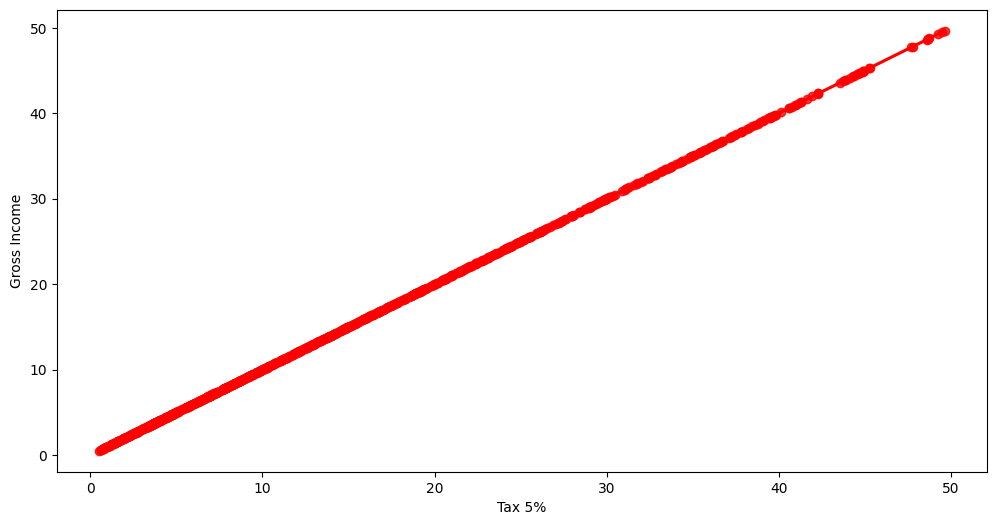

In [7]:

plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='Tax 5%',y='gross income',data=df,color='Red')
plt.xlabel('Tax 5%')
plt.ylabel('Gross Income')
plt.show()

To see the distrubation of differant ratings

<Figure size 640x480 with 0 Axes>

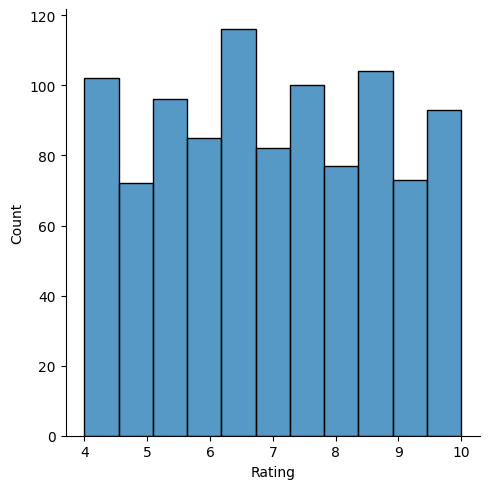

In [8]:
plt.figure()
sns.displot(df['Rating'])
plt.show()

/tmp/ipykernel_19/2762702988.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rating'])


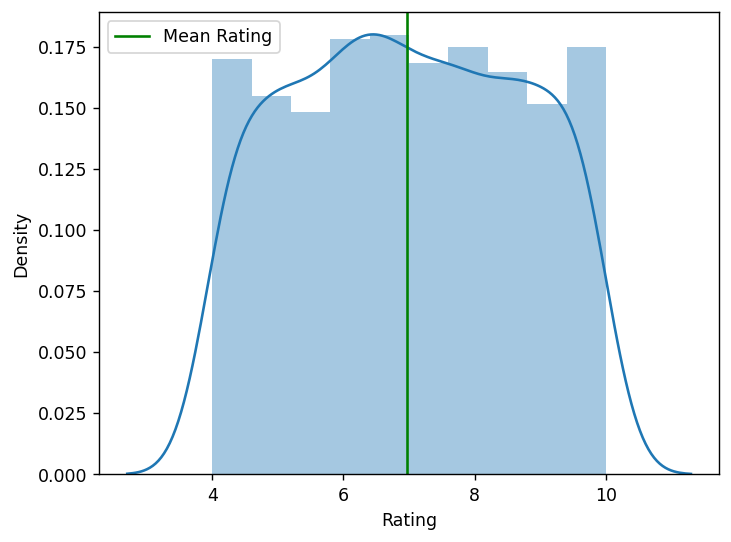

In [9]:
# To find Mean Rating
plt.figure(dpi=125)
sns.distplot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']),c='green',label='Mean Rating')
plt.legend()
plt.show()

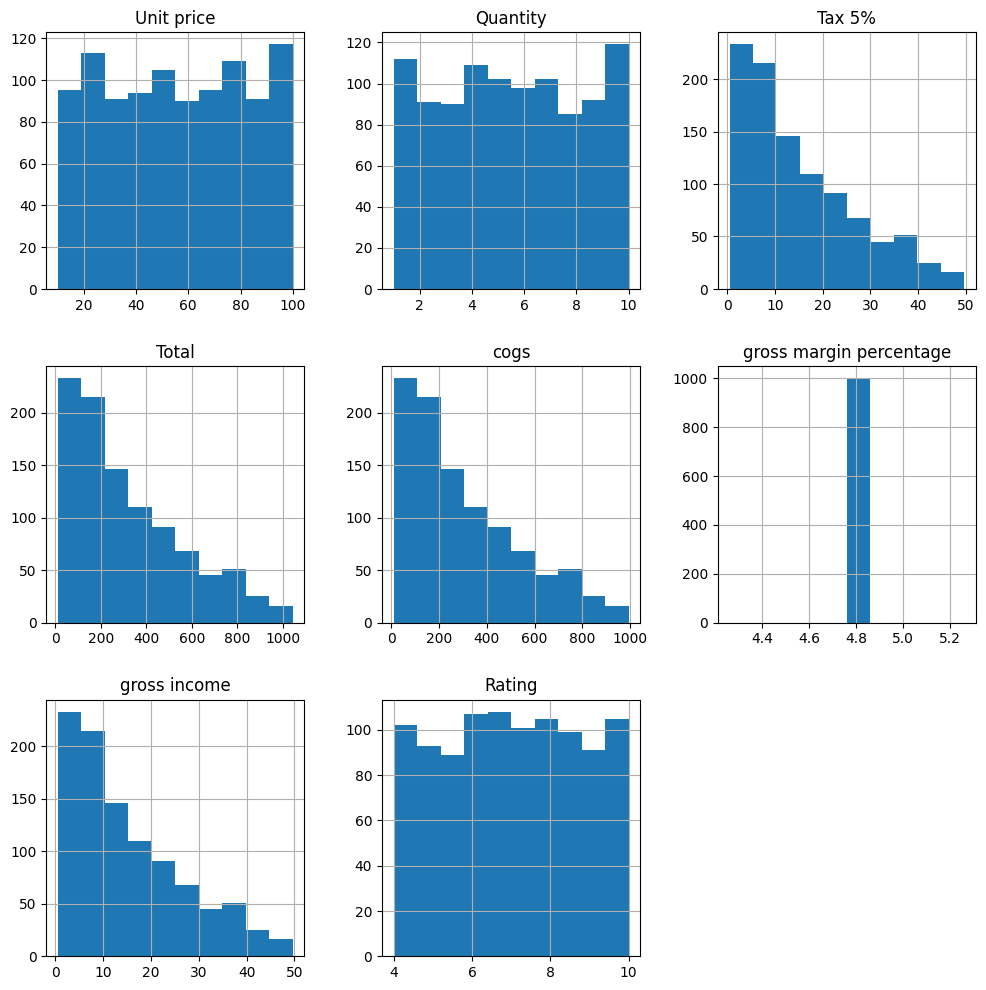

In [10]:
#ploting histogram for all
df.hist(figsize=(12,12))
plt.show()

# Gender

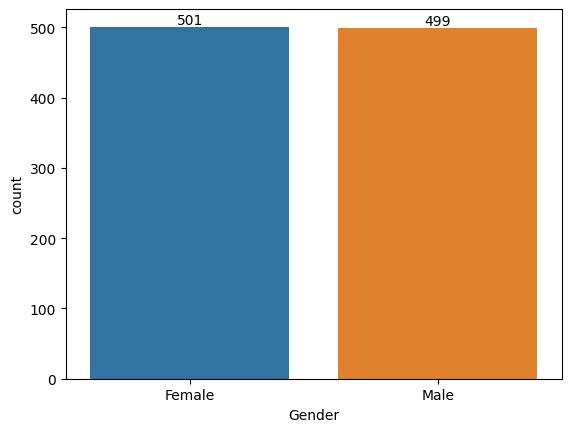

In [11]:
ax=sns.countplot(df,x='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

[Text(0, 0, '167883'), Text(0, 0, '155084')]

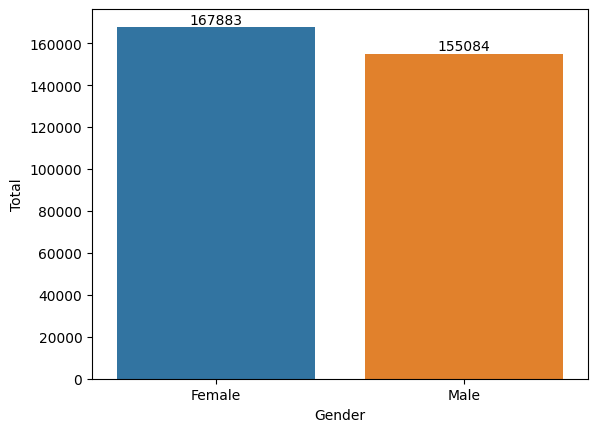

In [12]:
genderwise_sales=df.groupby(by='Gender',as_index=False)['Total'].sum().sort_values(by='Total',ascending=False)
a1=sns.barplot(genderwise_sales,x='Gender',y='Total')
a1.bar_label(a1.containers[0])

**From the above we can see that Female buying amount is grater than male**

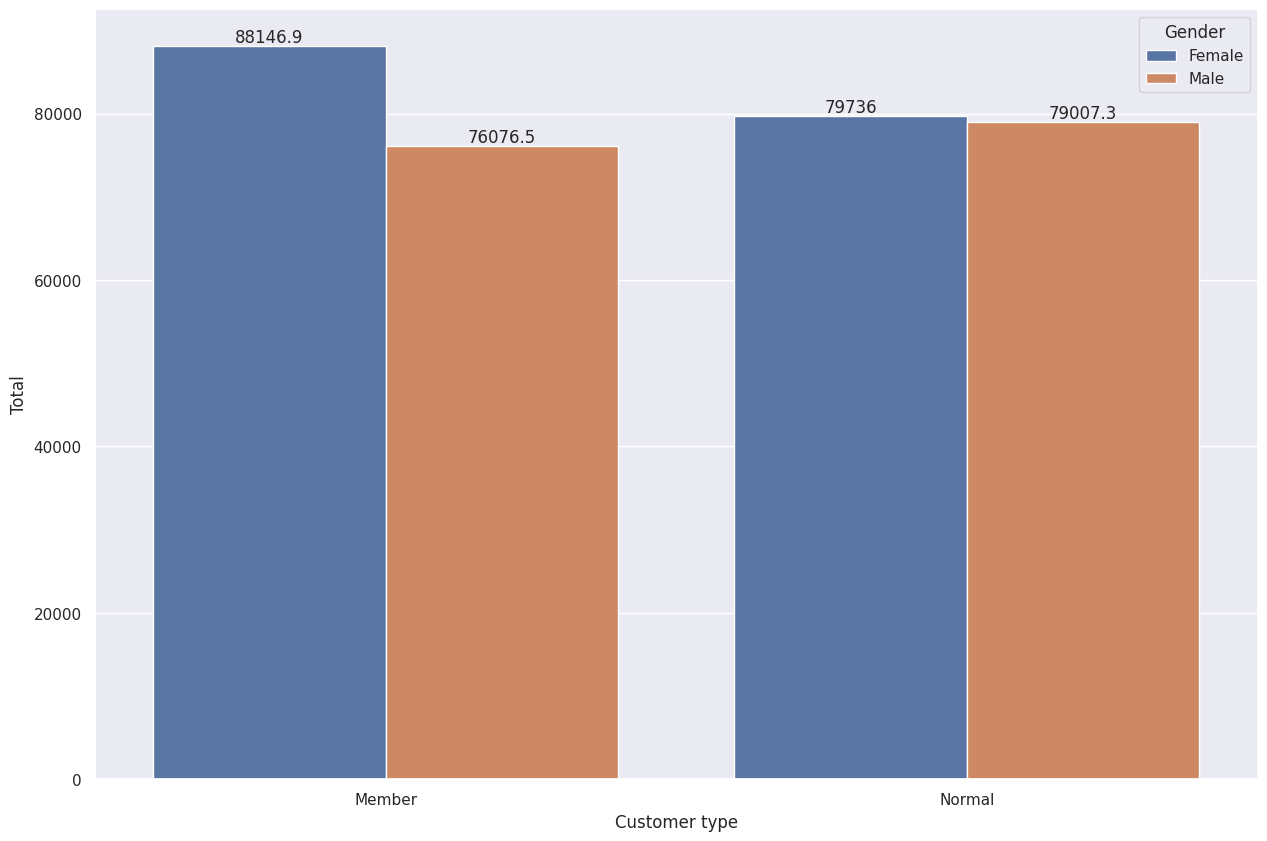

In [13]:
genderwise_Customortype=df.groupby(by=['Gender','Customer type'],as_index=False)['Total'].sum()
sns.set(rc={'figure.figsize':(15,10)})
cx=sns.barplot(genderwise_Customortype,x='Customer type',y='Total',hue='Gender')
for bars in cx.containers:
    cx.bar_label(bars)

In [14]:
genderwise_Ctype=df.groupby(by=['Gender','Customer type'])['Customer type'].count()
genderwise_Ctype


Gender  Customer type
Female  Member           261
        Normal           240
Male    Member           240
        Normal           259
Name: Customer type, dtype: int64

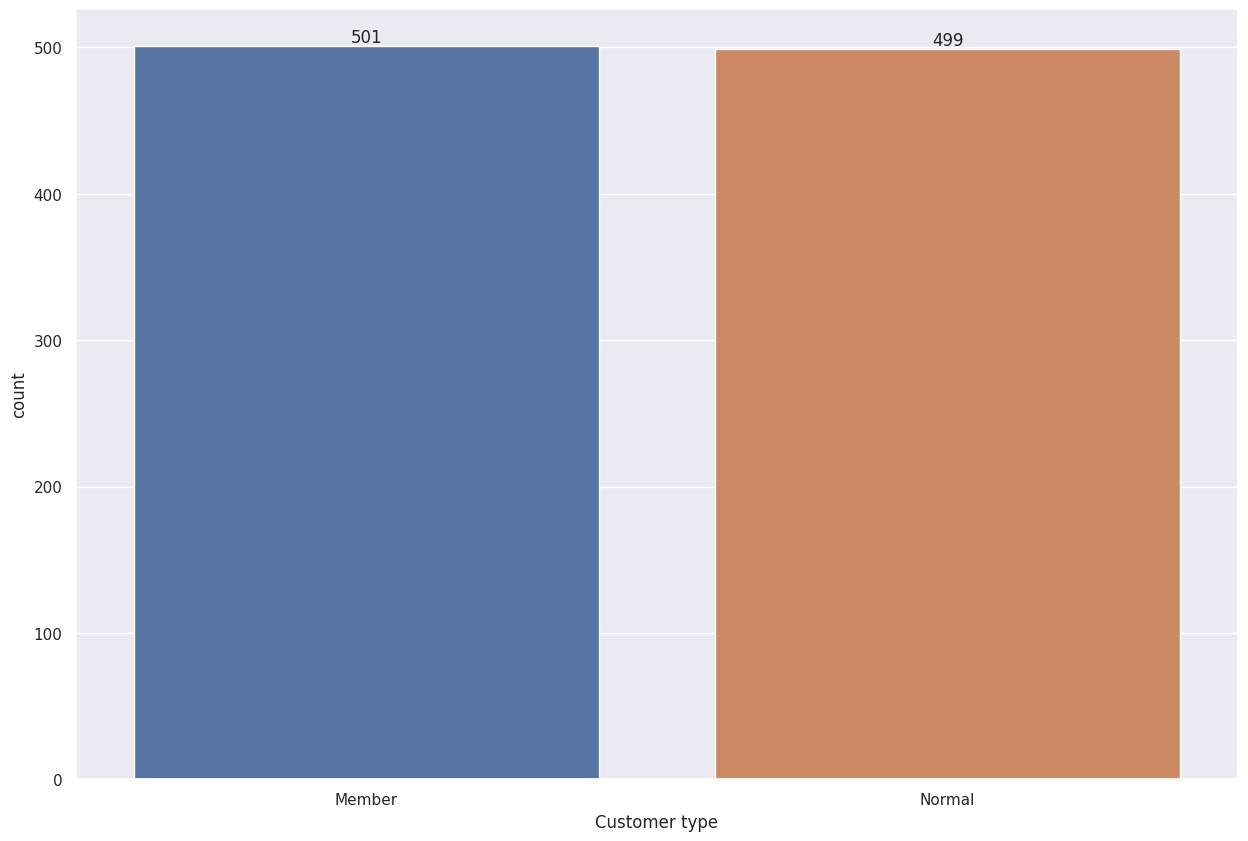

In [15]:
bx=sns.countplot(df,x='Customer type')
for bars in bx.containers:
    bx.bar_label(bars)

In [16]:
df['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

[Text(0, 0, '110569'), Text(0, 0, '106200'), Text(0, 0, '106198')]

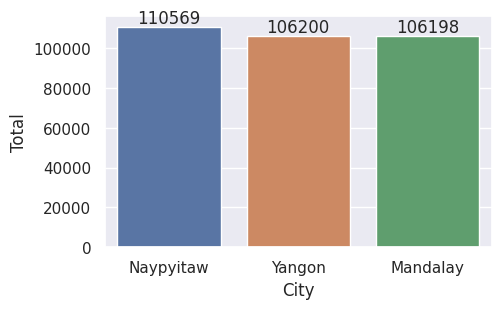

In [17]:
city_sales=df.groupby(by='City',as_index=False)['Total'].sum().sort_values(by='Total',ascending=False)
sns.set(rc={'figure.figsize':(5,3)})
b1=sns.barplot(city_sales,x='City',y='Total')
b1.bar_label(b1.containers[0])


In [18]:
df['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

[Text(0, 0, '56144.8'),
 Text(0, 0, '55122.8'),
 Text(0, 0, '54337.5'),
 Text(0, 0, '54305.9'),
 Text(0, 0, '53861.9'),
 Text(0, 0, '49193.7')]

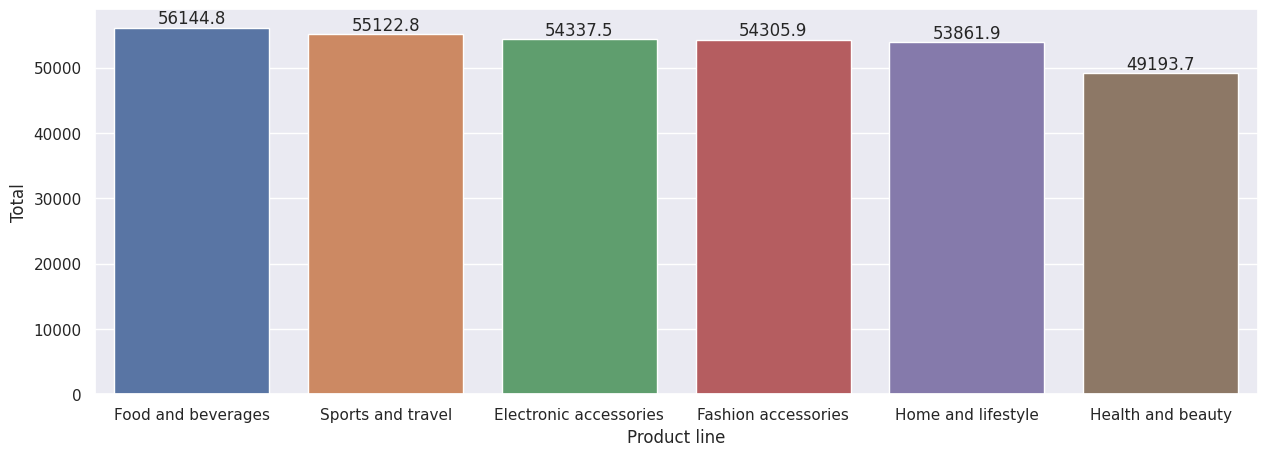

In [19]:
Productwise_sales=df.groupby(by='Product line',as_index=False)['Total'].sum().sort_values(by='Total',ascending=False)
sns.set(rc={'figure.figsize':(15,5)})
c1=sns.barplot(Productwise_sales,x='Product line',y='Total')
c1.bar_label(c1.containers[0])


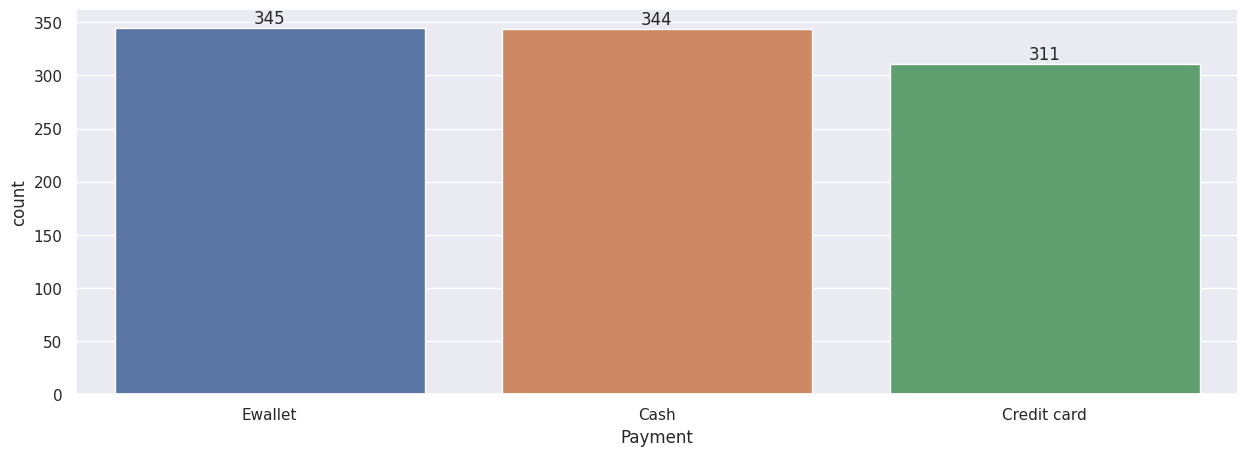

In [20]:
ex=sns.countplot(df,x='Payment')
for bars in ex.containers:
    ex.bar_label(bars)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

[Text(0, 0, '2673.56'),
 Text(0, 0, '2624.9'),
 Text(0, 0, '2587.5'),
 Text(0, 0, '2585.99'),
 Text(0, 0, '2564.85'),
 Text(0, 0, '2342.56')]

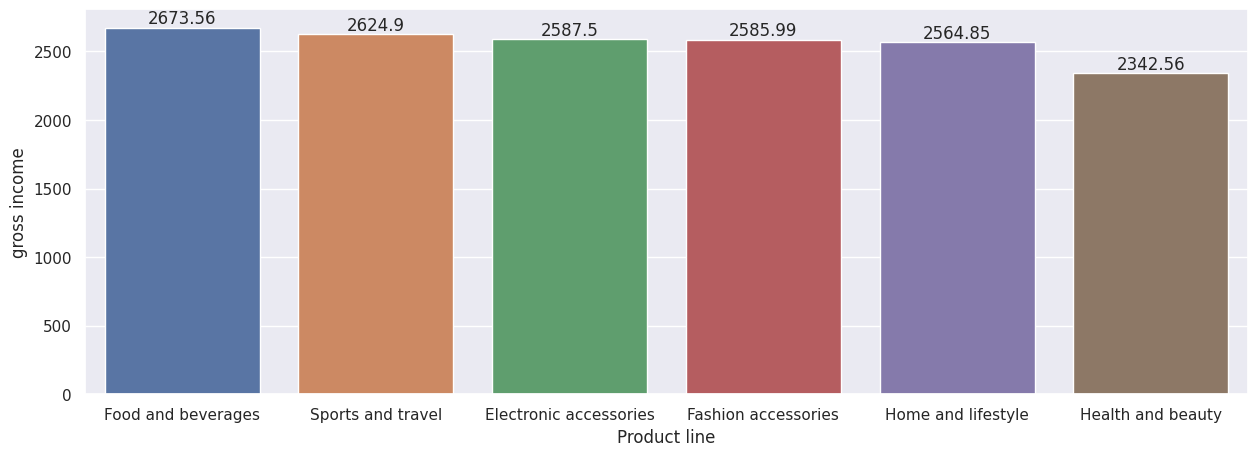

In [22]:
gross_income=df.groupby(by='Product line',as_index=False)['gross income'].sum().sort_values(by='gross income',ascending=False)
sns.set(rc={'figure.figsize':(15,5)})
f1=sns.barplot(gross_income,x='Product line',y='gross income')
f1.bar_label(f1.containers[0])


[Text(0, 0, '7.11322'),
 Text(0, 0, '7.02921'),
 Text(0, 0, '7.00329'),
 Text(0, 0, '6.92471'),
 Text(0, 0, '6.91627'),
 Text(0, 0, '6.8375')]

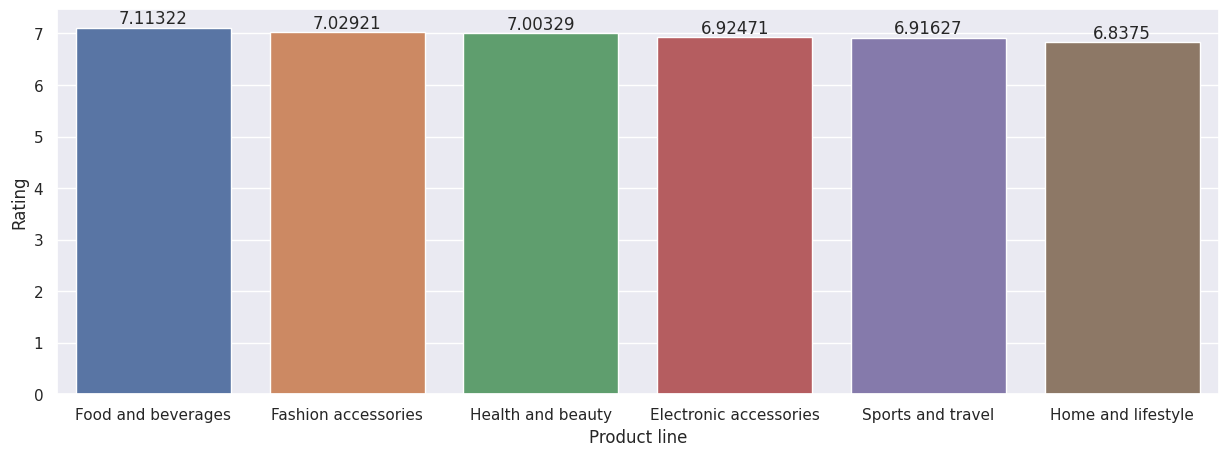

In [23]:
Avg_rateing=df.groupby(by='Product line',as_index=False)['Rating'].mean().sort_values(by='Rating',ascending=False)
sns.set(rc={'figure.figsize':(15,5)})
g1=sns.barplot(Avg_rateing,x='Product line',y='Rating')
g1.bar_label(g1.containers[0])
